In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install tabulate


In [2]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

# Load the selected mRNA data file from Boruta; assumes the first column is "Sample_ID" and the rest are gene features.
df_mrna = pd.read_csv("mrna_selected.csv")

# The selected features (genes) are in the column headers (except "Sample_ID")
gene_list = list(df_mrna.columns)
if "Sample_ID" in gene_list:
    gene_list.remove("Sample_ID")
print("Number of selected genes:", len(gene_list))

# Perform enrichment analysis using Enrichr via gseapy.
# Here, we use KEGG, GO Biological Process, and Reactome gene sets.
# Changing cutoff to 1.0 here retrieves all terms regardless of their p-value.
try:
    enr = gp.enrichr(
        gene_list=gene_list,
        gene_sets=['KEGG_2019_Human', 'GO_Biological_Process_2018', 'Reactome_2016'],
        organism='Human',
        outdir='enrichr_results',
        cutoff=1.0  # Set cutoff to 1.0 to include all enriched terms
    )
except Exception as e:
    print("Error sending gene list to Enrichr. This may be a temporary server issue. Please try again later.")
    print("Detailed error:", e)
    raise

# The enrichment results are stored in enr.results (a DataFrame).
# For example, check the top 10 enriched KEGG pathways.
enr_results_kegg = enr.results[enr.results['Gene_set'] == 'KEGG_2019_Human']
print("Top enriched KEGG pathways:")
print(enr_results_kegg.head(15))

# Plot a bar plot of the top 10 KEGG pathways.
# Here, we set cutoff to 1.0 so that all terms are plotted.
gp.barplot(enr_results_kegg, title='Top 10 KEGG Pathways', cutoff=1.0, ofname='kegg_barplot.png')
plt.show()


Number of selected genes: 37
Top enriched KEGG pathways:
           Gene_set                                      Term Overlap  \
0   KEGG_2019_Human             Inositol phosphate metabolism    2/74   
1   KEGG_2019_Human     Phosphatidylinositol signaling system    2/99   
2   KEGG_2019_Human            Ubiquitin mediated proteolysis   2/137   
3   KEGG_2019_Human                            Thyroid cancer    1/37   
4   KEGG_2019_Human  Glycine, serine and threonine metabolism    1/40   
5   KEGG_2019_Human                               Endocytosis   2/244   
6   KEGG_2019_Human                Nucleotide excision repair    1/47   
7   KEGG_2019_Human                                   Malaria    1/49   
8   KEGG_2019_Human                        Endometrial cancer    1/58   
9   KEGG_2019_Human                   Glycerolipid metabolism    1/61   
10  KEGG_2019_Human                      Basal cell carcinoma    1/63   
11  KEGG_2019_Human                Non-small cell lung cancer    1/

In [3]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

# Load the selected methylation data file; assumes the first column is "Sample_ID" and the rest are gene features.
df_meth = pd.read_csv("methylation_selected.csv")

# The selected features (genes) are in the column headers (except "Sample_ID")
gene_list_meth = list(df_meth.columns)
if "Sample_ID" in gene_list_meth:
    gene_list_meth.remove("Sample_ID")
print("Number of selected methylation features:", len(gene_list_meth))

# Perform enrichment analysis using Enrichr via gseapy.
try:
    enr_meth = gp.enrichr(
        gene_list=gene_list_meth,
        gene_sets=['KEGG_2019_Human', 'GO_Biological_Process_2018', 'Reactome_2016'],
        organism='Human',
        outdir='enrichr_results_methylation',
        cutoff=1.0  # Set cutoff to 1.0 to include all terms
    )
except Exception as e:
    print("Error sending methylation gene list to Enrichr. Please try again later.")
    print("Detailed error:", e)
    raise

# Filter and display KEGG pathway results for methylation data.
enr_results_kegg_meth = enr_meth.results[enr_meth.results['Gene_set'] == 'KEGG_2019_Human']
print("Top enriched KEGG pathways for methylation features:")
print(enr_results_kegg_meth)

# Plot a bar plot of the top 10 KEGG pathways.
gp.barplot(enr_results_kegg_meth, title='Top 10 KEGG Pathways (Methylation)', cutoff=1.0, ofname='kegg_barplot_methylation.png')
plt.show()


Number of selected methylation features: 30
Top enriched KEGG pathways for methylation features:
           Gene_set                                               Term  \
0   KEGG_2019_Human                                Thiamine metabolism   
1   KEGG_2019_Human                                Folate biosynthesis   
2   KEGG_2019_Human                               Butanoate metabolism   
3   KEGG_2019_Human           Vasopressin-regulated water reabsorption   
4   KEGG_2019_Human                        Aminoacyl-tRNA biosynthesis   
5   KEGG_2019_Human                                  Adherens junction   
6   KEGG_2019_Human                   Fc gamma R-mediated phagocytosis   
7   KEGG_2019_Human                       Choline metabolism in cancer   
8   KEGG_2019_Human                     Neurotrophin signaling pathway   
9   KEGG_2019_Human                                          Autophagy   
10  KEGG_2019_Human  Signaling pathways regulating pluripotency of ...   

   Overlap   P

In [4]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

# Load the selected CNA data file; assumes the first column is "Sample_ID" and the rest are gene features.
df_cna = pd.read_csv("cna_selected.csv")

# The selected features (genes) are in the column headers (except "Sample_ID")
gene_list_cna = list(df_cna.columns)
if "Sample_ID" in gene_list_cna:
    gene_list_cna.remove("Sample_ID")
print("Number of selected CNA features:", len(gene_list_cna))

# Perform enrichment analysis using Enrichr via gseapy.
try:
    enr_cna = gp.enrichr(
        gene_list=gene_list_cna,
        gene_sets=['KEGG_2019_Human', 'GO_Biological_Process_2018', 'Reactome_2016'],
        organism='Human',
        outdir='enrichr_results_cna',
        cutoff=1.0  # Set cutoff to 1.0 to include all terms
    )
except Exception as e:
    print("Error sending CNA gene list to Enrichr. Please try again later.")
    print("Detailed error:", e)
    raise

# Filter and display KEGG pathway results for CNA data.
enr_results_kegg_cna = enr_cna.results[enr_cna.results['Gene_set'] == 'KEGG_2019_Human']
print("Top enriched KEGG pathways for CNA features:")
print(enr_results_kegg_cna.head(10))

# Plot a bar plot of the top 10 KEGG pathways.
gp.barplot(enr_results_kegg_cna, title='Top 10 KEGG Pathways (CNA)', cutoff=1.0, ofname='kegg_barplot_cna.png')
plt.show()


Number of selected CNA features: 4
Error sending CNA gene list to Enrichr. Please try again later.
Detailed error: Warning: No enrich terms when cutoff = 1.0


ValueError: Warning: No enrich terms when cutoff = 1.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter, KaplanMeierFitter

# -----------------------------
# 1. Load Data and Merge
# -----------------------------

# Load the selected gene expression data (e.g., mRNA_selected.csv)
df_expr = pd.read_csv("mrna_selected.csv")

# Extract gene list (all column names except "Sample_ID")
gene_list = list(df_expr.columns)
if "Sample_ID" in gene_list:
    gene_list.remove("Sample_ID")
print("Number of selected genes:", len(gene_list))

# Load the preprocessed clinical data that contains recurrence info using PFS
clinical = pd.read_csv("data_clinical_patient_preprocessed.csv")

# Ensure clinical data has the required columns: Sample_ID, PFS_MONTHS, PFS_STATUS
required_cols = ["Sample_ID", "PFS_MONTHS", "PFS_STATUS"]
clinical = clinical[required_cols]

# Merge gene expression data with clinical data on Sample_ID
df_merged = pd.merge(df_expr, clinical, on="Sample_ID", how="inner")
print("Merged data shape:", df_merged.shape)

# -----------------------------
# 2. Univariate Cox Regression Analysis
# -----------------------------

results = []
for gene in gene_list:
    try:
        # Prepare a temporary DataFrame with PFS_MONTHS, PFS_STATUS, and the gene expression.
        df_gene = df_merged[['PFS_MONTHS', 'PFS_STATUS', gene]].dropna()
        # Rename the gene column to "expression" for ease of use.
        df_gene = df_gene.rename(columns={gene: "expression"})
        
        # Initialize and fit the Cox Proportional Hazards model
        cph = CoxPHFitter()
        cph.fit(df_gene, duration_col='PFS_MONTHS', event_col='PFS_STATUS')
        
        # Extract hazard ratio and p-value for the gene
        hr = cph.hazard_ratios_['expression']
        p_val = cph.summary.loc['expression', 'p']
        
        results.append({"gene": gene, "HR": hr, "p_value": p_val})
    except Exception as e:
        print(f"Error processing gene {gene}: {e}")

# Convert the list of results to a DataFrame and sort by p-value.
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("p_value")
print("Top 10 genes associated with recurrence prediction:")
print(results_df.head(10))

# -----------------------------
# 3. Visualization: Volcano Plot
# -----------------------------

# Calculate log2 of the Hazard Ratio and -log10 of the p-value for plotting.
results_df['log2HR'] = np.log2(results_df['HR'])
results_df['minus_log10_p'] = -np.log10(results_df['p_value'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=results_df, x='log2HR', y='minus_log10_p', s=100)
plt.title("Volcano Plot of Univariate Cox Regression (Recurrence Prediction)")
plt.xlabel("log2(Hazard Ratio)")
plt.ylabel("-log10(p-value)")
# Draw a horizontal red dashed line at p=0.05 threshold (-log10(0.05))
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', label="p=0.05")
plt.legend()
plt.show()

# -----------------------------
# 4. Visualization: Kaplan–Meier Curve for Top Gene
# -----------------------------

# Select the top gene (smallest p-value) from the Cox regression results.
top_gene = results_df.iloc[0]['gene']
print("Top gene for KM analysis:", top_gene)

# Prepare a DataFrame for Kaplan–Meier analysis for the top gene.
df_top = df_merged[['Sample_ID', 'PFS_MONTHS', 'PFS_STATUS', top_gene]].dropna()

# Stratify patients into 'High' and 'Low' expression groups based on the median expression.
median_expr = df_top[top_gene].median()
df_top['group'] = df_top[top_gene].apply(lambda x: 'High' if x >= median_expr else 'Low')

# Initialize the KaplanMeierFitter and plot survival curves for each group.
kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))
for group, grp_df in df_top.groupby('group'):
    kmf.fit(grp_df['PFS_MONTHS'], event_observed=grp_df['PFS_STATUS'], label=group)
    kmf.plot_survival_function(ci_show=True)
    
plt.title(f"Kaplan–Meier Survival Curves for {top_gene}")
plt.xlabel("Progression-Free Survival (Months)")
plt.ylabel("Survival Probability")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter, KaplanMeierFitter

# -----------------------------
# 1. Load Methylation Data and Merge with Clinical Data
# -----------------------------
# Load the selected methylation data file (assumes first column is "Sample_ID")
df_meth = pd.read_csv("methylation_selected.csv")

# Extract the list of selected features (gene identifiers)
gene_list_meth = list(df_meth.columns)
if "Sample_ID" in gene_list_meth:
    gene_list_meth.remove("Sample_ID")
print("Number of selected methylation features:", len(gene_list_meth))

# Load the preprocessed clinical data (using PFS for recurrence prediction)
clinical = pd.read_csv("data_clinical_patient_preprocessed.csv")
clinical = clinical[["Sample_ID", "PFS_MONTHS", "PFS_STATUS"]]

# Merge methylation data with clinical data on Sample_ID
df_merged_meth = pd.merge(df_meth, clinical, on="Sample_ID", how="inner")
print("Merged methylation data shape:", df_merged_meth.shape)

# -----------------------------
# 2. Univariate Cox Regression for Each Methylation Feature
# -----------------------------
results_meth = []
for gene in gene_list_meth:
    try:
        # Prepare a temporary DataFrame with PFS_MONTHS, PFS_STATUS, and expression for one gene.
        df_gene = df_merged_meth[['PFS_MONTHS', 'PFS_STATUS', gene]].dropna()
        # Rename the gene column to "expression" for consistency.
        df_gene = df_gene.rename(columns={gene: "expression"})
        
        # Fit the Cox Proportional Hazards model.
        cph = CoxPHFitter()
        cph.fit(df_gene, duration_col='PFS_MONTHS', event_col='PFS_STATUS')
        
        # Retrieve the hazard ratio (HR) and p-value for the gene.
        hr = cph.hazard_ratios_['expression']
        p_val = cph.summary.loc['expression', 'p']
        
        results_meth.append({"gene": gene, "HR": hr, "p_value": p_val})
    except Exception as e:
        print(f"Error processing methylation gene {gene}: {e}")

# Convert the results into a DataFrame and sort by p-value.
results_df_meth = pd.DataFrame(results_meth).sort_values("p_value")
print("Top 10 methylation features associated with recurrence prediction:")
print(results_df_meth.head(10))

# -----------------------------
# 3. Volcano Plot for Methylation Data
# -----------------------------
results_df_meth['log2HR'] = np.log2(results_df_meth['HR'])
results_df_meth['minus_log10_p'] = -np.log10(results_df_meth['p_value'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_meth, x='log2HR', y='minus_log10_p', s=100)
plt.title("Volcano Plot of Methylation Univariate Cox Regression")
plt.xlabel("log2(Hazard Ratio)")
plt.ylabel("-log10(p-value)")
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', label="p=0.05")
plt.legend()
plt.show()

# -----------------------------
# 4. Kaplan–Meier Survival Curve for Top Methylation Feature
# -----------------------------
# Select the top feature (with the smallest p-value)
top_gene_meth = results_df_meth.iloc[0]['gene']
print("Top methylation feature for KM analysis:", top_gene_meth)

# Prepare data for KM analysis
df_top_meth = df_merged_meth[['Sample_ID', 'PFS_MONTHS', 'PFS_STATUS', top_gene_meth]].dropna()
# Stratify patients into high and low expression groups based on the median value.
median_expr_meth = df_top_meth[top_gene_meth].median()
df_top_meth['group'] = df_top_meth[top_gene_meth].apply(lambda x: 'High' if x >= median_expr_meth else 'Low')

kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))
for group, grp_df in df_top_meth.groupby('group'):
    kmf.fit(grp_df['PFS_MONTHS'], event_observed=grp_df['PFS_STATUS'], label=group)
    kmf.plot_survival_function(ci_show=True)
    
plt.title(f"Kaplan–Meier Survival Curves for {top_gene_meth} (Methylation)")
plt.xlabel("Progression-Free Survival (Months)")
plt.ylabel("Survival Probability")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter, KaplanMeierFitter

# -----------------------------
# 1. Load CNA Data and Merge with Clinical Data
# -----------------------------
# Load the selected CNA data file (assumes first column is "Sample_ID")
df_cna = pd.read_csv("cna_selected.csv")

# Extract the list of selected features (gene identifiers)
gene_list_cna = list(df_cna.columns)
if "Sample_ID" in gene_list_cna:
    gene_list_cna.remove("Sample_ID")
print("Number of selected CNA features:", len(gene_list_cna))

# Load the preprocessed clinical data (using PFS for recurrence prediction)
clinical = pd.read_csv("data_clinical_patient_preprocessed.csv")
clinical = clinical[["Sample_ID", "PFS_MONTHS", "PFS_STATUS"]]

# Merge CNA data with clinical data on Sample_ID
df_merged_cna = pd.merge(df_cna, clinical, on="Sample_ID", how="inner")
print("Merged CNA data shape:", df_merged_cna.shape)

# -----------------------------
# 2. Univariate Cox Regression for Each CNA Feature
# -----------------------------
results_cna = []
for gene in gene_list_cna:
    try:
        # Prepare a temporary DataFrame with PFS_MONTHS, PFS_STATUS, and the gene's expression.
        df_gene = df_merged_cna[['PFS_MONTHS', 'PFS_STATUS', gene]].dropna()
        # Rename the gene column to "expression" for consistency.
        df_gene = df_gene.rename(columns={gene: "expression"})
        
        # Fit the Cox Proportional Hazards model.
        cph = CoxPHFitter()
        cph.fit(df_gene, duration_col='PFS_MONTHS', event_col='PFS_STATUS')
        
        # Retrieve the hazard ratio (HR) and p-value for the gene.
        hr = cph.hazard_ratios_['expression']
        p_val = cph.summary.loc['expression', 'p']
        
        results_cna.append({"gene": gene, "HR": hr, "p_value": p_val})
    except Exception as e:
        print(f"Error processing CNA gene {gene}: {e}")

# Convert the results into a DataFrame and sort by p-value.
results_df_cna = pd.DataFrame(results_cna).sort_values("p_value")
print("Top 10 CNA features associated with recurrence prediction:")
print(results_df_cna.head(10))

# -----------------------------
# 3. Volcano Plot for CNA Data
# -----------------------------
results_df_cna['log2HR'] = np.log2(results_df_cna['HR'])
results_df_cna['minus_log10_p'] = -np.log10(results_df_cna['p_value'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_cna, x='log2HR', y='minus_log10_p', s=100)
plt.title("Volcano Plot of CNA Univariate Cox Regression")
plt.xlabel("log2(Hazard Ratio)")
plt.ylabel("-log10(p-value)")
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', label="p=0.05")
plt.legend()
plt.show()

# -----------------------------
# 4. Kaplan–Meier Survival Curve for Top CNA Feature
# -----------------------------
# Select the top feature (with the smallest p-value)
top_gene_cna = results_df_cna.iloc[0]['gene']
print("Top CNA feature for KM analysis:", top_gene_cna)

# Prepare data for KM analysis for the top CNA feature.
df_top_cna = df_merged_cna[['Sample_ID', 'PFS_MONTHS', 'PFS_STATUS', top_gene_cna]].dropna()
# Stratify patients into high and low expression groups based on the median.
median_expr_cna = df_top_cna[top_gene_cna].median()
df_top_cna['group'] = df_top_cna[top_gene_cna].apply(lambda x: 'High' if x >= median_expr_cna else 'Low')

kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))
for group, grp_df in df_top_cna.groupby('group'):
    kmf.fit(grp_df['PFS_MONTHS'], event_observed=grp_df['PFS_STATUS'], label=group)
    kmf.plot_survival_function(ci_show=True)
    
plt.title(f"Kaplan–Meier Survival Curves for {top_gene_cna} (CNA)")
plt.xlabel("Progression-Free Survival (Months)")
plt.ylabel("Survival Probability")
plt.show()


# Only Omics

In [14]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy.spatial.distance import pdist, squareform

def construct_similarity_network(data_path, top_n=3, method="pearson", output_file=None):
    """
    Constructs a patient similarity network from a selected omics file.
    
    Parameters:
      data_path: Path to the CSV file with selected features (first column should be "Sample_ID").
      top_n: Number of top similar neighbors to connect.
      method: "pearson" or "euclidean" to calculate similarity.
      output_file: If provided, saves the edgelist to this file.
      
    Returns:
      G: A NetworkX graph.
    """
    # Load data and separate Sample_ID and features
    df = pd.read_csv(data_path)
    sample_ids = df["Sample_ID"].values
    features = df.drop(columns=["Sample_ID"]).values
    
    if method == "pearson":
        # Compute Pearson correlation matrix (samples x samples)
        similarity_matrix = np.corrcoef(features)
    elif method == "euclidean":
        dist_matrix = squareform(pdist(features, metric="euclidean"))
        similarity_matrix = 1 / (1 + dist_matrix)  # convert distance to similarity
    else:
        raise ValueError("Method not recognized!")
    
    # Create a DataFrame for similarity matrix for easier handling.
    sim_df = pd.DataFrame(similarity_matrix, index=sample_ids, columns=sample_ids)
    
    # Create a graph: for each patient, connect to top_n most similar (excluding self).
    G = nx.Graph()
    G.add_nodes_from(sample_ids)
    for sid in sample_ids:
        # Exclude self by dropping the current sample.
        neighbors = sim_df.loc[sid].drop(sid)
        # Select top_n neighbors
        top_neighbors = neighbors.nlargest(top_n)
        for neighbor, sim in top_neighbors.items():
            G.add_edge(sid, neighbor, weight=sim)
            
    if output_file:
        nx.write_edgelist(G, output_file, data=["weight"])
        print(f"Network saved to {output_file} with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    
    return G

# Construct networks for each omics type
G_mrna = construct_similarity_network("mrna_selected.csv", top_n=3, method="pearson", output_file="mrna_network.edgelist")
G_methylation = construct_similarity_network("methylation_selected.csv", top_n=3, method="pearson", output_file="methylation_network.edgelist")
G_cna = construct_similarity_network("cna_selected.csv", top_n=3, method="pearson", output_file="cna_network.edgelist")


Network saved to mrna_network.edgelist with 199 nodes and 456 edges.
Network saved to methylation_network.edgelist with 199 nodes and 426 edges.
Network saved to cna_network.edgelist with 199 nodes and 404 edges.


In [15]:
from torch_geometric.utils import from_networkx
import torch

# Assume all networks have the same nodes; here we use the mrna network as our base.
common_sample_ids = list(G_mrna.nodes())
print("Common sample IDs count:", len(common_sample_ids))

def load_omics_features(data_path, sample_ids):
    """
    Loads the omics data file and returns a feature matrix (ordered by sample_ids).
    """
    df = pd.read_csv(data_path)
    df["Sample_ID"] = df["Sample_ID"].astype(str)
    if "Survival_Label" in df.columns:
        df = df.drop(columns=["Survival_Label"])
    df_ordered = df.set_index("Sample_ID").reindex(sample_ids)
    return torch.tensor(df_ordered.values, dtype=torch.float)

# Create feature matrices for each view.
X_mrna = load_omics_features("mrna_selected.csv", common_sample_ids)
X_methylation = load_omics_features("methylation_selected.csv", common_sample_ids)
X_cna = load_omics_features("cna_selected.csv", common_sample_ids)

# Convert one of the networks to a PyG Data object (we'll use it as the common graph structure).
data_common = from_networkx(G_mrna, group_edge_attrs=["weight"])

# Create one data object per view by assigning the corresponding features.
data_mrna = data_common.clone()
data_mrna.x = X_mrna

data_methylation = data_common.clone()
data_methylation.x = X_methylation

data_cna = data_common.clone()
data_cna.x = X_cna

print("mRNA feature shape:", data_mrna.x.shape)
print("Methylation feature shape:", data_methylation.x.shape)
print("CNA feature shape:", data_cna.x.shape)


Common sample IDs count: 199
mRNA feature shape: torch.Size([199, 37])
Methylation feature shape: torch.Size([199, 30])
CNA feature shape: torch.Size([199, 4])


In [16]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GATModel(nn.Module):
    def __init__(self, in_features, hidden_features, out_features, num_heads=1, dropout=0.6):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_features, hidden_features, heads=num_heads, dropout=dropout)
        # Output dimension of conv1 is hidden_features * num_heads
        self.conv2 = GATConv(hidden_features * num_heads, out_features, heads=1, concat=False, dropout=dropout)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x  # shape: (num_samples, out_features)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Hyperparameters (adjust as needed)
embedding_dim = 16  # Output embedding size for each branch
hidden_dim = 16
num_heads = 4

model_mrna = GATModel(in_features=data_mrna.x.shape[1], hidden_features=hidden_dim, out_features=embedding_dim, num_heads=num_heads).to(device)
model_methylation = GATModel(in_features=data_methylation.x.shape[1], hidden_features=hidden_dim, out_features=embedding_dim, num_heads=num_heads).to(device)
model_cna = GATModel(in_features=data_cna.x.shape[1], hidden_features=hidden_dim, out_features=embedding_dim, num_heads=num_heads).to(device)

# Move PyG data objects to device.
data_mrna = data_mrna.to(device)
data_methylation = data_methylation.to(device)
data_cna = data_cna.to(device)


Using device: cuda


In [17]:
class VCDN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(VCDN, self).__init__()
        # For three views, we compute three pairwise outer products.
        # Each outer product is flattened (embedding_dim x embedding_dim = embedding_dim^2),
        # concatenated to form a vector of length 3 * embedding_dim^2.
        self.fc = nn.Sequential(
            nn.Linear(3 * embedding_dim * embedding_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        
    def forward(self, z1, z2, z3):
        # z1, z2, z3: shape (num_samples, embedding_dim)
        outer12 = torch.bmm(z1.unsqueeze(2), z2.unsqueeze(1))  # (num_samples, embedding_dim, embedding_dim)
        outer13 = torch.bmm(z1.unsqueeze(2), z3.unsqueeze(1))
        outer23 = torch.bmm(z2.unsqueeze(2), z3.unsqueeze(1))
        # Flatten each outer product
        flat12 = outer12.view(outer12.size(0), -1)
        flat13 = outer13.view(outer13.size(0), -1)
        flat23 = outer23.view(outer23.size(0), -1)
        fused = torch.cat([flat12, flat13, flat23], dim=1)  # shape: (num_samples, 3 * embedding_dim^2)
        output = self.fc(fused)
        return output  # shape: (num_samples, output_dim)

# For example, if you want to perform binary classification (subtype or survival risk),
# set output_dim=2. Adjust hidden_dim in VCDN as needed.
vcdn = VCDN(embedding_dim=embedding_dim, hidden_dim=128, output_dim=2).to(device)


In [18]:
# Load survival labels
df_labels = pd.read_csv("survival_labels.csv")
df_labels["Sample_ID"] = df_labels["Sample_ID"].astype(str)
# Create a mapping from Sample_ID to label (0/1)
label_dict = dict(zip(df_labels["Sample_ID"], df_labels["Survival_Label"]))

# Make sure the ordering of labels aligns with common_sample_ids
labels = [label_dict.get(sid, 0) for sid in common_sample_ids]
labels_tensor = torch.tensor(labels, dtype=torch.long).to(device)


In [19]:
import torch.optim as optim

# Combine parameters of all three GAT models and the VCDN for joint training.
optimizer = optim.Adam(list(model_mrna.parameters()) +
                       list(model_methylation.parameters()) +
                       list(model_cna.parameters()) +
                       list(vcdn.parameters()),
                       lr=0.005, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

num_epochs = 100

for epoch in range(1, num_epochs + 1):
    model_mrna.train()
    model_methylation.train()
    model_cna.train()
    vcdn.train()
    optimizer.zero_grad()
    
    # Obtain embeddings from each branch
    emb_mrna = model_mrna(data_mrna)          # shape: (num_samples, embedding_dim)
    emb_methylation = model_methylation(data_methylation)
    emb_cna = model_cna(data_cna)
    
    # Fuse embeddings using VCDN
    fused_output = vcdn(emb_mrna, emb_methylation, emb_cna)  # shape: (num_samples, 2)
    
    loss = criterion(fused_output, labels_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0 or epoch == 1:
        _, preds = torch.max(fused_output, 1)
        correct = (preds == labels_tensor).sum().item()
        acc = correct / labels_tensor.size(0)
        print(f"Epoch {epoch:03d}: Loss = {loss.item():.4f}, Accuracy = {acc:.4f}")


Epoch 001: Loss = 0.7165, Accuracy = 0.5025
Epoch 010: Loss = 0.6081, Accuracy = 0.6482
Epoch 020: Loss = 0.6228, Accuracy = 0.7588
Epoch 030: Loss = 0.6025, Accuracy = 0.7739
Epoch 040: Loss = 0.4996, Accuracy = 0.7739
Epoch 050: Loss = 0.4596, Accuracy = 0.7688
Epoch 060: Loss = 0.4809, Accuracy = 0.7940
Epoch 070: Loss = 0.3757, Accuracy = 0.8040
Epoch 080: Loss = 0.4855, Accuracy = 0.8040
Epoch 090: Loss = 0.4266, Accuracy = 0.7789
Epoch 100: Loss = 0.4217, Accuracy = 0.8291


In [20]:
# Set models to evaluation mode.
model_mrna.eval()
model_methylation.eval()
model_cna.eval()
vcdn.eval()

with torch.no_grad():
    emb_mrna = model_mrna(data_mrna)
    emb_methylation = model_methylation(data_methylation)
    emb_cna = model_cna(data_cna)
    fused_output = vcdn(emb_mrna, emb_methylation, emb_cna)
    
# Save fused embeddings for further analysis.
fused_embeddings = fused_output.cpu().numpy()
df_fused = pd.DataFrame(fused_embeddings, columns=["Fused_1", "Fused_2"])
df_fused.insert(0, "Sample_ID", common_sample_ids)
df_fused.to_csv("fused_embeddings.csv", index=False)
print("Fused embeddings saved to 'fused_embeddings.csv'.")


Fused embeddings saved to 'fused_embeddings.csv'.


In [21]:

import pandas as pd

# Load fused embeddings and survival labels.
df_features = pd.read_csv("fused_embeddings.csv")  # e.g., contains Sample_ID, Fused_1, Fused_2, ...
df_labels = pd.read_csv("survival_labels.csv")      # contains Sample_ID and Survival_Label

# Merge based on Sample_ID (ensure Sample_ID is of the same type)
df_features["Sample_ID"] = df_features["Sample_ID"].astype(str)
df_labels["Sample_ID"] = df_labels["Sample_ID"].astype(str)
df = pd.merge(df_features, df_labels, on="Sample_ID", how="inner")
print("Merged data shape:", df.shape)



Merged data shape: (199, 4)


In [22]:
import numpy as np

# Assume that 'Survival_Label' is the target column (binary: 0/1)
# and all columns except 'Sample_ID' and 'Survival_Label' are features.
X = df.drop(columns=["Sample_ID", "Survival_Label"]).values
y = df["Survival_Label"].values

print("Feature shape:", X.shape)
print("Labels distribution:", np.unique(y, return_counts=True))


Feature shape: (199, 2)
Labels distribution: (array([0, 1], dtype=int64), array([ 88, 111], dtype=int64))


In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (20% test, stratified by label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (139, 2) Test shape: (60, 2)



MLP Accuracy: 0.8500
Classification Report for MLP:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.96      0.76      0.85        33

    accuracy                           0.85        60
   macro avg       0.86      0.86      0.85        60
weighted avg       0.87      0.85      0.85        60



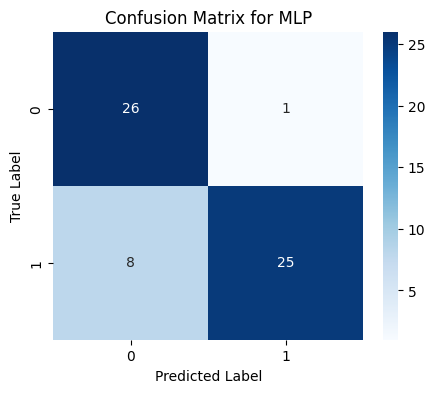


SVM Accuracy: 0.8667
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        27
           1       1.00      0.76      0.86        33

    accuracy                           0.87        60
   macro avg       0.89      0.88      0.87        60
weighted avg       0.90      0.87      0.87        60



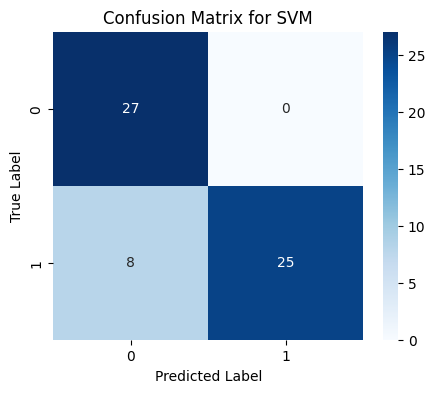


XGBoost Accuracy: 0.8833
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.93      0.85      0.89        33

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


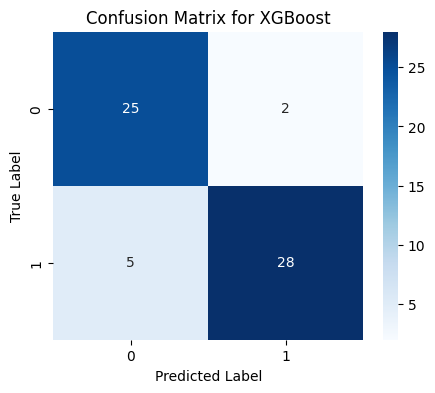


Random Forest Accuracy: 0.8667
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.96      0.79      0.87        33

    accuracy                           0.87        60
   macro avg       0.88      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60



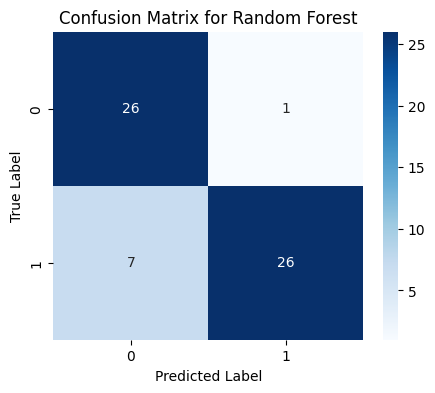

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define classifiers
clf_mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, random_state=42)
clf_svm = SVC(kernel="rbf", probability=True, random_state=42)
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
clf_rf = RandomForestClassifier(n_estimators=200, random_state=42)

classifiers = {
    "MLP": clf_mlp,
    "SVM": clf_svm,
    "XGBoost": clf_xgb,
    "Random Forest": clf_rf
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    
    # Compute and visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"accuracy": acc, "confusion_matrix": cm}
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Ensemble Accuracy: 0.8333
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        27
           1       1.00      0.70      0.82        33

    accuracy                           0.83        60
   macro avg       0.86      0.85      0.83        60
weighted avg       0.88      0.83      0.83        60



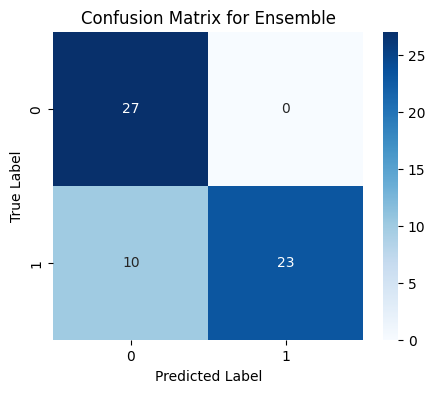

In [25]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ("MLP", clf_mlp),
        ("SVM", clf_svm),
        ("XGBoost", clf_xgb),
        ("RF", clf_rf)
    ],
    voting="hard"
)

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\nEnsemble Accuracy: {acc_ensemble:.4f}")
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Ensemble")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
)
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
import itertools

#  1. Load GAT Embeddings and Survival Labels
print("Loading GAT embeddings and survival labels...")
embeddings = pd.read_csv("fused_embeddings.csv")
survival_labels = pd.read_csv("survival_labels.csv")

embeddings["Sample_ID"] = embeddings["Sample_ID"].astype(str)
survival_labels["Sample_ID"] = survival_labels["Sample_ID"].astype(str)

#  2. Merge Labels with Embeddings
merged_data = pd.merge(survival_labels, embeddings, on="Sample_ID", how="inner")
X = merged_data.drop(columns=["Sample_ID", "Survival_Label"]).values
y = merged_data["Survival_Label"].values

# 3. Define Classifiers
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), activation="relu", solver="adam", max_iter=5000, random_state=42)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, eval_metric="logloss", random_state=42)
rf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
svm = SVC(kernel="rbf", C=1, probability=True, random_state=42)

ensemble = VotingClassifier(estimators=[
    ('MLP', mlp),
    ('XGB', xgb),
    ('RF', rf),
    ('SVM', svm)
], voting="soft")

models = {
    "MLP": mlp,
    "XGB": xgb,
    "RandomForest": rf,
    "SVM": svm,
    "Ensemble": ensemble
}

# 4. Cross-Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_summary = {model_name: [] for model_name in models.keys()}

# 5. Cross-Validation Loop
for model_name, model in models.items():
    print(f"\n{'=' * 20}\nTraining {model_name} with 5-Fold Cross-Validation")
    fold = 1
    fold_results = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Handle imbalance with SMOTE if needed
        if np.min(np.bincount(y_train)) / np.max(np.bincount(y_train)) < 0.5:
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)

        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average="macro")
        f1_weighted = f1_score(y_test, y_pred, average="weighted")
        sensitivity = recall_score(y_test, y_pred, pos_label=1)  # True Positive Rate
        specificity = recall_score(y_test, y_pred, pos_label=0)  # True Negative Rate
        precision = precision_score(y_test, y_pred, average="macro")
        recall_overall = recall_score(y_test, y_pred, average="macro")
        auc_score = roc_auc_score(y_test, y_prob)

        fold_result = {
            "Fold": fold,
            "Accuracy": accuracy,
            "Macro-F1": f1_macro,
            "Weighted-F1": f1_weighted,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "Precision": precision,
            "Recall": recall_overall,
            "AUC": auc_score
        }

        fold_results.append(fold_result)
        print(f"Fold {fold} - Accuracy: {accuracy:.3f}, AUC: {auc_score:.3f}, Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}, Precision: {precision:.3f}, Recall: {recall_overall:.3f}")
        fold += 1

    results_summary[model_name] = fold_results

#  6. Aggregate Results and Display Summary
final_summary = []

for model_name, folds in results_summary.items():
    metrics_df = pd.DataFrame(folds)
    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    final_summary.append({
        "Model": model_name,
        "Accuracy": f"{avg_metrics['Accuracy']:.3f} ± {std_metrics['Accuracy']:.3f}",
        "Macro-F1": f"{avg_metrics['Macro-F1']:.3f} ± {std_metrics['Macro-F1']:.3f}",
        "Weighted-F1": f"{avg_metrics['Weighted-F1']:.3f} ± {std_metrics['Weighted-F1']:.3f}",
        "Sensitivity": f"{avg_metrics['Sensitivity']:.3f} ± {std_metrics['Sensitivity']:.3f}",
        "Specificity": f"{avg_metrics['Specificity']:.3f} ± {std_metrics['Specificity']:.3f}",
        "Precision": f"{avg_metrics['Precision']:.3f} ± {std_metrics['Precision']:.3f}",
        "Recall": f"{avg_metrics['Recall']:.3f} ± {std_metrics['Recall']:.3f}",
        "AUC": f"{avg_metrics['AUC']:.3f} ± {std_metrics['AUC']:.3f}"
    })

summary_df = pd.DataFrame(final_summary)
summary_df.to_csv("cross_validation_results.csv", index=False)

print("\nFinal Cross-Validation Summary:")
print(tabulate(summary_df, headers="keys", tablefmt="pretty"))


Loading GAT embeddings and survival labels...

Training MLP with 5-Fold Cross-Validation
Fold 1 - Accuracy: 0.875, AUC: 0.967, Sensitivity: 0.783, Specificity: 1.000, Precision: 0.886, Recall: 0.891
Fold 2 - Accuracy: 0.750, AUC: 0.917, Sensitivity: 0.909, Specificity: 0.556, Precision: 0.774, Recall: 0.732
Fold 3 - Accuracy: 0.825, AUC: 0.934, Sensitivity: 0.682, Specificity: 1.000, Precision: 0.860, Recall: 0.841
Fold 4 - Accuracy: 0.850, AUC: 0.947, Sensitivity: 0.955, Specificity: 0.722, Precision: 0.868, Recall: 0.838
Fold 5 - Accuracy: 0.795, AUC: 0.941, Sensitivity: 0.727, Specificity: 0.882, Precision: 0.802, Recall: 0.805

Training XGB with 5-Fold Cross-Validation
Fold 1 - Accuracy: 0.850, AUC: 0.954, Sensitivity: 0.826, Specificity: 0.882, Precision: 0.847, Recall: 0.854
Fold 2 - Accuracy: 0.800, AUC: 0.903, Sensitivity: 0.864, Specificity: 0.722, Precision: 0.802, Recall: 0.793
Fold 3 - Accuracy: 0.700, AUC: 0.883, Sensitivity: 0.682, Specificity: 0.722, Precision: 0.700, Re